# Regex Examples

## 1. findall and sub

In [1]:
s3 = "In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn.  CS 320 is awesome!"
s4 = """In CS 320,  there are 10 quizzes,    7 projects,
39 lectures, and 1000 things to learn.  CS 320 is awesome!"""

In [2]:
print(s3)

In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn.  CS 320 is awesome!


In [3]:
import re

In [4]:
# GOAL: build a dict (thing => count, for example "projects" => 7)
matches = re.findall(r"(\d+) (\w+)", s3)
matches

[('10', 'quizzes'),
 ('7', 'projects'),
 ('39', 'lectures'),
 ('1000', 'things'),
 ('320', 'is')]

In [5]:
d = {}
for count, thing in matches:
    d[thing] = int(count)
d

{'quizzes': 10, 'projects': 7, 'lectures': 39, 'things': 1000, 'is': 320}

In [6]:
print(s4)

In CS 320,  there are 10 quizzes,    7 projects,
39 lectures, and 1000 things to learn.  CS 320 is awesome!


In [7]:
re.sub(r"\s+", " ", s4)

'In CS 320, there are 10 quizzes, 7 projects, 39 lectures, and 1000 things to learn. CS 320 is awesome!'

## 2. Git Logs

In [8]:
from subprocess import check_output

In [9]:
output = str(check_output(["git", "log"]), "utf-8")
print(output[:300])

commit db0b60608cae54b4f03d3865a2869d898f427b38
Author: Tyler <tharter@wisc.edu>
Date:   Fri Oct 28 17:48:45 2022 +0000

    oct 28 demos

commit 84beaa349296c3c1a997e09b1995bedd74c2af63
Author: Tyler <tharter@wisc.edu>
Date:   Wed Oct 26 18:23:15 2022 +0000

    oct 26 demos

commit 061df9417c373d4


In [10]:
# find all the commit numbers
commits = re.findall(r"[0-9a-f]{40}", output)
commits[:5]

['db0b60608cae54b4f03d3865a2869d898f427b38',
 '84beaa349296c3c1a997e09b1995bedd74c2af63',
 '061df9417c373d4758b84b8f84c2c28b16268e1d',
 'e0c198c43d15fe8a3bd939872108d9dcf8a8c45a',
 '5c2caab558065660b34e06aa11177c47f401ba22']

In [11]:
# GOAL: what days of the week are people working the most

In [12]:
days = re.findall(r"Date:\s*(\w+)", output)
days[:10]

['Fri', 'Wed', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Thu', 'Thu']

In [13]:
import pandas as pd
pd.Series(days).value_counts()

Thu    39
Mon    17
Fri    14
Tue    12
Sat    10
Wed     9
Sun     6
dtype: int64

<AxesSubplot:>

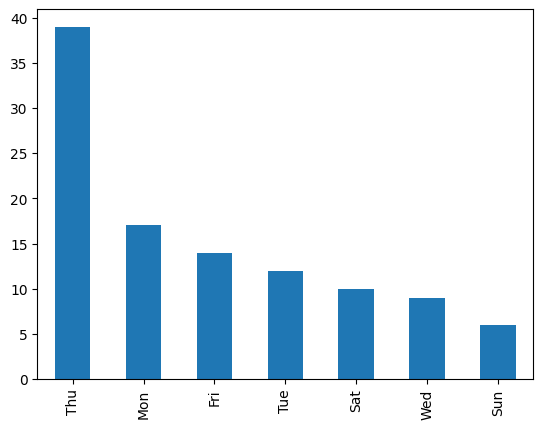

In [14]:
pd.Series(days).value_counts().plot.bar()

In [15]:
print(output[:300])

commit db0b60608cae54b4f03d3865a2869d898f427b38
Author: Tyler <tharter@wisc.edu>
Date:   Fri Oct 28 17:48:45 2022 +0000

    oct 28 demos

commit 84beaa349296c3c1a997e09b1995bedd74c2af63
Author: Tyler <tharter@wisc.edu>
Date:   Wed Oct 26 18:23:15 2022 +0000

    oct 26 demos

commit 061df9417c373d4


In [16]:
# GOAL: find authors
re.findall(r"Author:\s*(.+?)\s*<", output)[:20]

['Tyler',
 'Tyler',
 'M. Iván Jaen M',
 'Ivan Jaen-Marquez',
 'Ivan Jaen-Marquez',
 'Tyler Caraza-Harter',
 'Tyler',
 'Tyler',
 'Ivan Jaen-Marquez',
 'Ivan Jaen-Marquez',
 'Ana Klabjan',
 'Ana Klabjan',
 'Ana Klabjan',
 'Ana Klabjan',
 'Ana Klabjan',
 'M. Iván Jaen M',
 'Ana Klabjan',
 'Ana Klabjan',
 'tylerharter',
 'tylerharter']

In [17]:
# WANT: any line containing a reference to a project
re.findall(r"\s*(.*[pP][1-7].*)", output)

['Merge pull request #8 from cs320-wisc/P4',
 'P4',
 'Merge pull request #7 from cs320-wisc/P4',
 'P4',
 'Merge pull request #6 from cs320-wisc/P4',
 'first changes to old p4',
 'first push of p6 draft',
 'added changes to old p4',
 'release P3',
 'release P2',
 'release P2',
 'p2 changes draft2',
 'added instructions to testing to include format of p1.ipynb',
 'p2 draft_1',
 'p2 draft _1',
 'p2 draft',
 'dataset for p2',
 'p1 typo',
 'release p1 starter video',
 'release p1 starter video',
 'release p1',
 'release p1',
 'p1 CSVs']

## 3. Emails

In [18]:
# TODO: actually scrape it
s = """
Tyler [Instructor] - tharter (AT) wisc.edu
Cong [Head TA] - cding44 (AT) wisc.edu
Bryce [TA] - bcjohnson7 (AT) wisc.edu
Connor [TA] - cbailey9 (AT) wisc.edu
Han [TA] - hwang638 (AT) wisc.edu
Hardik [TA] - hchauhan2 (AT) wisc.edu
Keaton [TA] - kleppanen (AT) wisc.edu
Nils [TA] - npalumbo (AT) wisc.edu
Yiyin [TA] - yshen82 (AT) wisc.edu
tharter@wisc.edu
"""
print(s)


Tyler [Instructor] - tharter (AT) wisc.edu
Cong [Head TA] - cding44 (AT) wisc.edu
Bryce [TA] - bcjohnson7 (AT) wisc.edu
Connor [TA] - cbailey9 (AT) wisc.edu
Han [TA] - hwang638 (AT) wisc.edu
Hardik [TA] - hchauhan2 (AT) wisc.edu
Keaton [TA] - kleppanen (AT) wisc.edu
Nils [TA] - npalumbo (AT) wisc.edu
Yiyin [TA] - yshen82 (AT) wisc.edu
tharter@wisc.edu



In [30]:
name = r"\w+"
at = r"@|([\(\[]?[Aa][Tt][\)\]?]?)"
domain = r"\w+\.(com|edu|org|io|net)"
total_regex = f"(({name})\s*{at}\s*{domain})"
print("REGEX:", total_regex)

for match in re.findall(total_regex, s):
    print(match)

REGEX: ((\w+)\s*@|([\(\[]?[Aa][Tt][\)\]?]?)\s*\w+\.(com|edu|org|io|net))
('(AT) wisc.edu', '', '(AT)', 'edu')
('(AT) wisc.edu', '', '(AT)', 'edu')
('(AT) wisc.edu', '', '(AT)', 'edu')
('(AT) wisc.edu', '', '(AT)', 'edu')
('(AT) wisc.edu', '', '(AT)', 'edu')
('(AT) wisc.edu', '', '(AT)', 'edu')
('(AT) wisc.edu', '', '(AT)', 'edu')
('(AT) wisc.edu', '', '(AT)', 'edu')
('(AT) wisc.edu', '', '(AT)', 'edu')
('tharter@', 'tharter', '', '')


In [38]:
# NOTE!  The above example was incomplete during lecture.  The issue
# was that the "|" in at was being used to ignore the name entirely#
# (once all the pieces were glued together).
#
# the fix is to put parethneses around each part in total_regex.
#
# correct version:
name = r"\w+"
at = r"@|([\(\[]?[Aa][Tt][\)\]?]?)"
domain = r"\w+\.(com|edu|org|io|net)"
total_regex = f"(({name})\s*({at})\s*({domain}))"
print("REGEX:", total_regex)

for match in re.findall(total_regex, s):
    print(match[1] + "@" + match[4])

REGEX: ((\w+)\s*(@|([\(\[]?[Aa][Tt][\)\]?]?))\s*(\w+\.(com|edu|org|io|net)))
tharter@wisc.edu
cding44@wisc.edu
bcjohnson7@wisc.edu
cbailey9@wisc.edu
hwang638@wisc.edu
hchauhan2@wisc.edu
kleppanen@wisc.edu
npalumbo@wisc.edu
yshen82@wisc.edu
tharter@wisc.edu


## 4. Function Names